In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from time import time

In [17]:
# Load the dataset
data_path = 'D:/MIAA/2-Ano/CiberSegurança/Trabalho/spambase/spambase.csv'
data = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Overview:")
data.head()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Scale the features for optimization
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_standard = standard_scaler.fit_transform(data.drop('spam', axis=1))  # For models except Naive Bayes
X_minmax = minmax_scaler.fit_transform(data.drop('spam', axis=1))  # For Naive Bayes
y = data['spam']  # Target


Dataset Overview:

Missing Values:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_


Analyzing Subset: Low Capital Run Length

Analyzing Subset: High Capital Run Length

Subset Comparison Results:


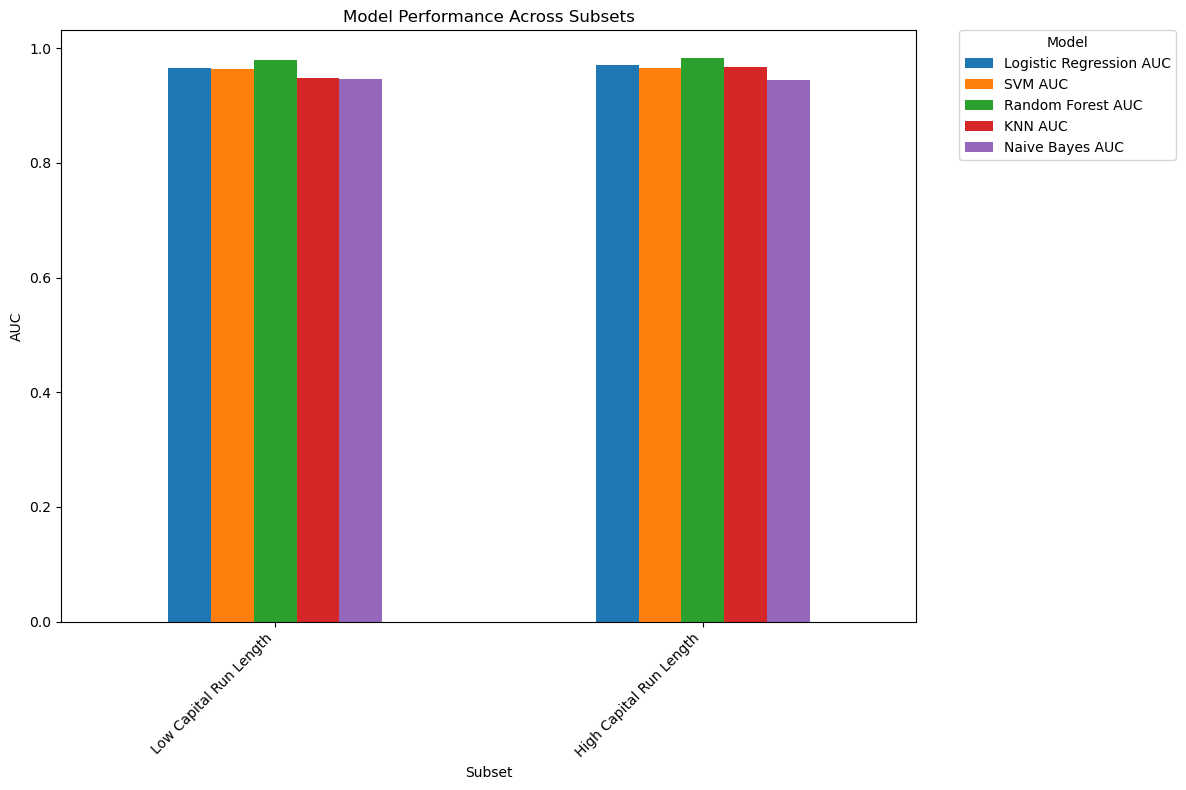

In [18]:
# Subset Analysis by Feature Range
subsets = [
    ("Low Capital Run Length", data[data['capital_run_length_average'] < data['capital_run_length_average'].median()]),
    ("High Capital Run Length", data[data['capital_run_length_average'] >= data['capital_run_length_average'].median()])
]

subset_results = []
for subset_name, subset_data in subsets:
    print(f"\nAnalyzing Subset: {subset_name}")
    subset_X_standard = standard_scaler.fit_transform(subset_data.drop('spam', axis=1))
    subset_X_minmax = minmax_scaler.fit_transform(subset_data.drop('spam', axis=1))
    subset_y = subset_data['spam']

    X_train_standard, X_test_standard, y_train, y_test = train_test_split(subset_X_standard, subset_y, test_size=0.3, random_state=42)
    X_train_minmax, X_test_minmax, _, _ = train_test_split(subset_X_minmax, subset_y, test_size=0.3, random_state=42)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=20000, solver='lbfgs', penalty='l2', C=1.0)
    log_reg.fit(X_train_standard, y_train)
    log_reg_preds = log_reg.predict(X_test_standard)
    log_reg_prob = log_reg.predict_proba(X_test_standard)[:, 1]
    log_reg_auc = auc(*roc_curve(y_test, log_reg_prob)[:2])

    # SVM
    svm = SVC(kernel='rbf', C=20, gamma='scale', probability=True, max_iter=20000)
    svm.fit(X_train_standard, y_train)
    svm_preds = svm.predict(X_test_standard)
    svm_prob = svm.predict_proba(X_test_standard)[:, 1]
    svm_auc = auc(*roc_curve(y_test, svm_prob)[:2])

    # Random Forest
    rf = RandomForestClassifier(n_estimators=1500, max_depth=60, random_state=42, criterion='gini')
    rf.fit(X_train_standard, y_train)
    rf_preds = rf.predict(X_test_standard)
    rf_prob = rf.predict_proba(X_test_standard)[:, 1]
    rf_auc = auc(*roc_curve(y_test, rf_prob)[:2])

    # KNN
    knn = KNeighborsClassifier(n_neighbors=20, weights='distance', metric='minkowski', p=2)
    knn.fit(X_train_standard, y_train)
    knn_preds = knn.predict(X_test_standard)
    knn_prob = knn.predict_proba(X_test_standard)[:, 1]
    knn_auc = auc(*roc_curve(y_test, knn_prob)[:2])

    # Naive Bayes
    nb = MultinomialNB()
    nb.fit(X_train_minmax, y_train)
    nb_preds = nb.predict(X_test_minmax)
    nb_prob = nb.predict_proba(X_test_minmax)[:, 1]
    nb_auc = auc(*roc_curve(y_test, nb_prob)[:2])

    # Collect Results
    subset_results.append({
        'Subset': subset_name,
        'Logistic Regression AUC': log_reg_auc,
        'SVM AUC': svm_auc,
        'Random Forest AUC': rf_auc,
        'KNN AUC': knn_auc,
        'Naive Bayes AUC': nb_auc
    })

# Display Subset Results
subset_results_df = pd.DataFrame(subset_results)
print("\nSubset Comparison Results:")
subset_results_df

# Visualize Subset Results
subset_results_df.set_index('Subset').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Across Subsets')
plt.ylabel('AUC')
plt.xlabel('Subset')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()



In [19]:
# General Model Analysis
X_train_standard, X_test_standard, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=42)
X_train_minmax, X_test_minmax, _, _ = train_test_split(X_minmax, y, test_size=0.3, random_state=42)

# Timing and Training Models
timing_results = []

# Logistic Regression
print("\nTraining Logistic Regression...")
start_time = time()
log_reg = LogisticRegression(max_iter=20000, solver='lbfgs', penalty='l2', C=1.0)
log_reg.fit(X_train_standard, y_train)
log_reg_time = time() - start_time
log_reg_preds = log_reg.predict(X_test_standard)
log_reg_prob = log_reg.predict_proba(X_test_standard)[:, 1]
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))
timing_results.append({'Model': 'Logistic Regression', 'Time': log_reg_time})

# Support Vector Machine (SVM)
print("\nTraining Support Vector Machine (SVM)...")
start_time = time()
svm = SVC(kernel='rbf', C=20, gamma='scale', probability=True, max_iter=20000)
svm.fit(X_train_standard, y_train)
svm_time = time() - start_time
svm_preds = svm.predict(X_test_standard)
svm_prob = svm.predict_proba(X_test_standard)[:, 1]
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))
timing_results.append({'Model': 'SVM', 'Time': svm_time})

# Random Forest
print("\nTraining Random Forest Classifier...")
start_time = time()
rf = RandomForestClassifier(n_estimators=1500, max_depth=60, random_state=42, criterion='gini')
rf.fit(X_train_standard, y_train)
rf_time = time() - start_time
rf_preds = rf.predict(X_test_standard)
rf_prob = rf.predict_proba(X_test_standard)[:, 1]
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
timing_results.append({'Model': 'Random Forest', 'Time': rf_time})

# K-Nearest Neighbors
print("\nTraining K-Nearest Neighbors (KNN)...")
start_time = time()
knn = KNeighborsClassifier(n_neighbors=20, weights='distance', metric='minkowski', p=2)
knn.fit(X_train_standard, y_train)
knn_time = time() - start_time
knn_preds = knn.predict(X_test_standard)
knn_prob = knn.predict_proba(X_test_standard)[:, 1]
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))
timing_results.append({'Model': 'KNN', 'Time': knn_time})

# Naive Bayes
print("\nTraining Naive Bayes...")
start_time = time()
nb = MultinomialNB()
nb.fit(X_train_minmax, y_train)
nb_time = time() - start_time
nb_preds = nb.predict(X_test_minmax)
nb_prob = nb.predict_proba(X_test_minmax)[:, 1]
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))
timing_results.append({'Model': 'Naive Bayes', 'Time': nb_time})




Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9232440260680667
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.93      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381


Training Support Vector Machine (SVM)...
SVM Results:
Accuracy: 0.9355539464156408
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       804
           1       0.94      0.90      0.92       577

    accuracy                           0.94      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.94      0.94      0.94      1381


Training Random Forest Classifier...
Random Forest Results:
Accuracy: 0.9565532223026793
              precision    recall  f1-score   support

           0       0.95   

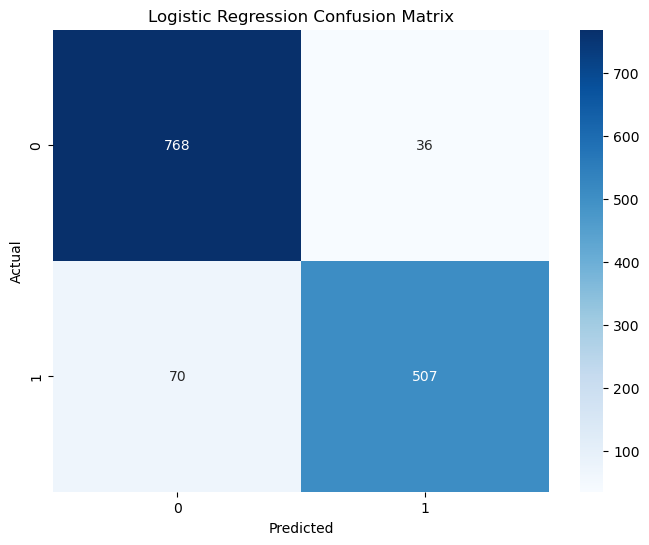

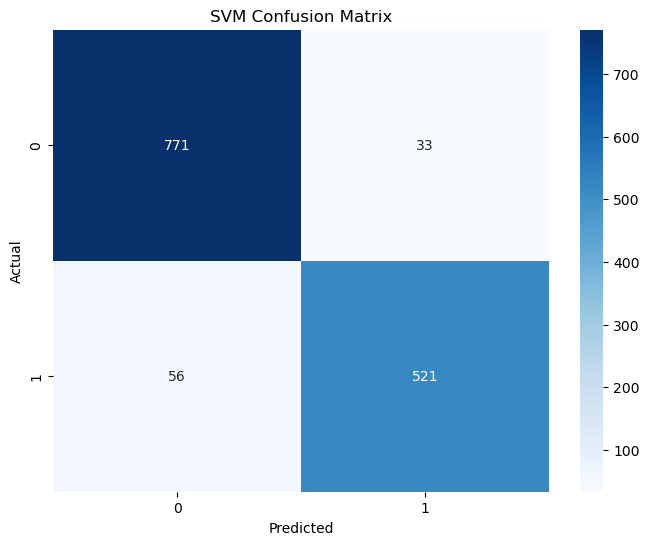

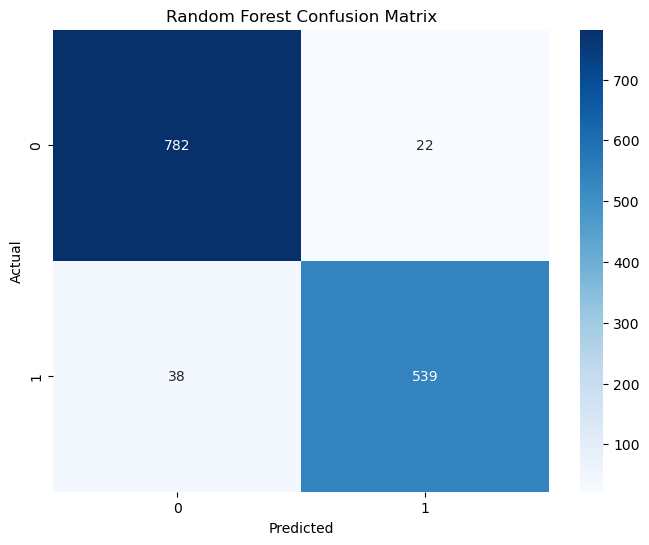

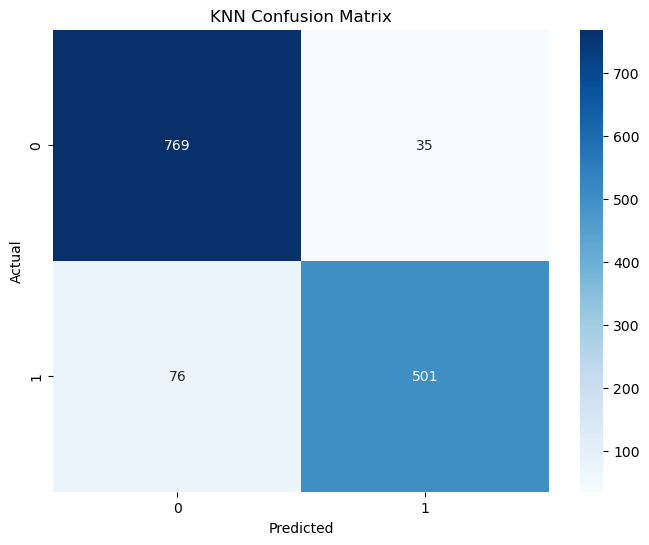

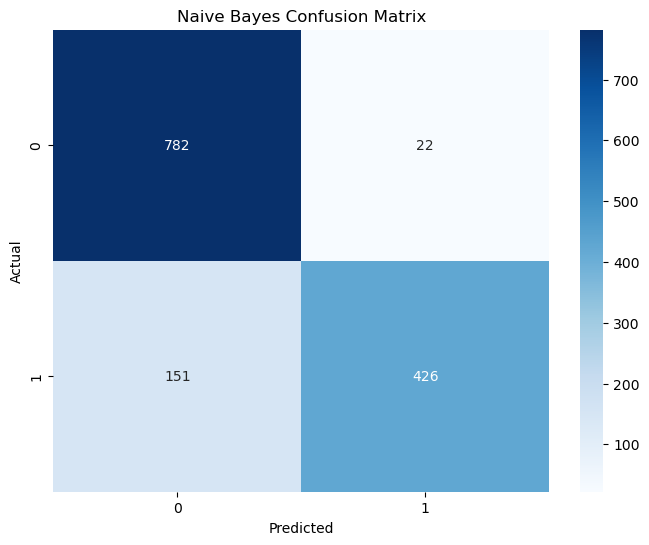

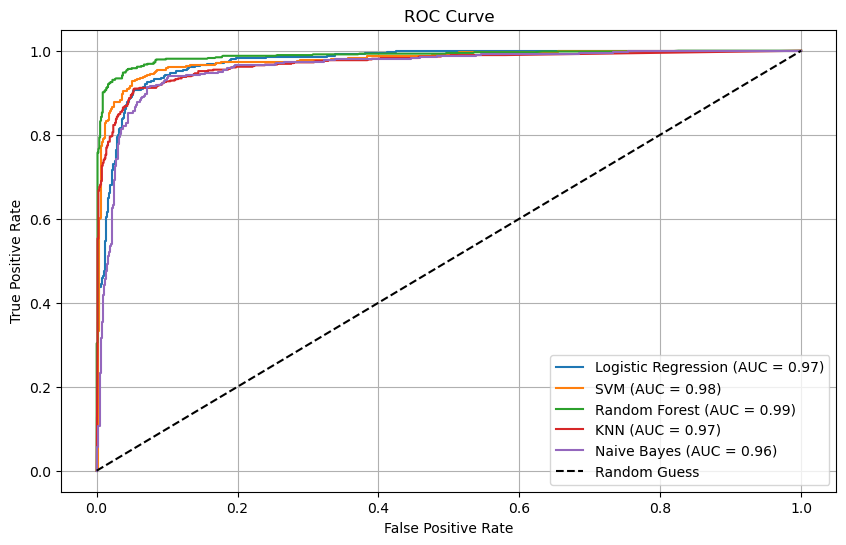

In [21]:
# Results Visualization
# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Visualization
plt.figure(figsize=(10, 6))

# Logistic Regression ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_prob)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# SVM ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Naive Bayes ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Random Guess ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()




Model Comparison:

Timing Results:


C:\Users\Ulisses\AppData\Local\Temp\ipykernel_3144\3834265411.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Time', data=timing_df, palette='viridis')


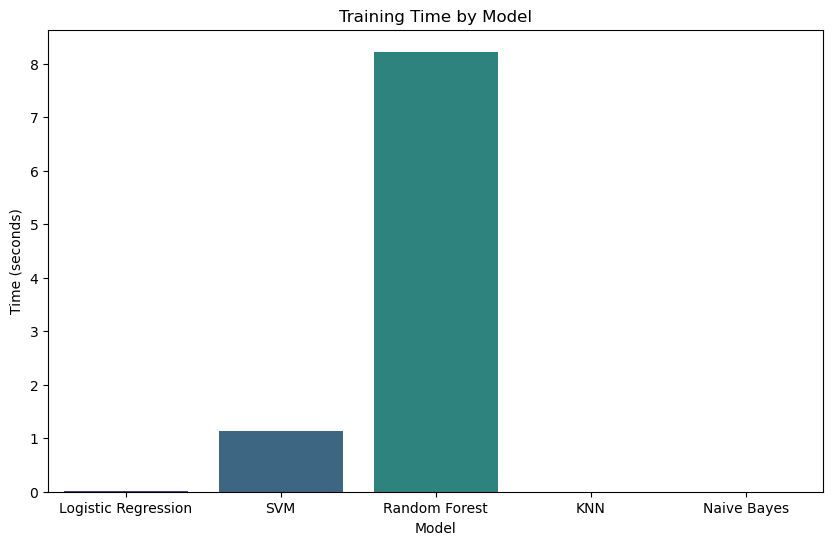


Conclusion:
The best performing model is Random Forest with an AUC of 0.99.


In [22]:
# Compare Models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, log_reg_preds),
        accuracy_score(y_test, svm_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, nb_preds)
    ],
    'AUC': [roc_auc_log_reg, roc_auc_svm, roc_auc_rf, roc_auc_knn, roc_auc_nb]
})

print("\nModel Comparison:")
results

# Timing Comparison
timing_df = pd.DataFrame(timing_results)
print("\nTiming Results:")
timing_df

# Plot Timing Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Time', data=timing_df, palette='viridis')
plt.title('Training Time by Model')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.show()

# Conclusion
print("\nConclusion:")
best_model = results.loc[results['AUC'].idxmax()]
print(f"The best performing model is {best_model['Model']} with an AUC of {best_model['AUC']:.2f}.")
